## BLM442 Keşif aktivitesi-5: Makine Öğrenmesi

#### İsim/Soyisim: Ali Bizhan Samim
#### Öğrenci Numarası: 120201098
#### E-mail: alibizhan.samim@gmail.com
#### Kullanılan dataset adı: Drug Review Dataset (Druglib.com)
#### Dataset url: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-5 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

#### Kısım 1 (Regresyon Analizi): Daha once kullanmıs oldugunuz (kesif aktivitesi 1 spreadsheet) veriseti üzerindeki kolonlar (Nümerik predictors ve nümerik cikti) arasındaki pozitif ve negatif korelasyonu bulunuz.  r veya R^2  değerlerini belirleyiniz.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
top100_athletes = pd.read_excel('top100_athletes.xlsx', sheet_name = 'top100_athletes')

In [3]:
top100_athletes.head(5)

,Name,Gold,Silver,Bronze,Total
0,"Michael Fred Phelps, II",23.0,3.0,2.0,28
1,Larysa Semenivna Latynina (Diriy-),9.0,5.0,4.0,18
2,Nikolay Yefimovich Andrianov,7.0,5.0,3.0,15
3,Edoardo Mangiarotti,6.0,5.0,2.0,13
4,Borys Anfiyanovych Shakhlin,7.0,4.0,2.0,13


In [4]:
top100_athletes = top100_athletes.fillna(0)

#### Correlation among the numeric columns

In [5]:
top100_athletes.corr(method ='pearson')

,Gold,Silver,Bronze,Total
Gold,1.000000,-0.260555,-0.264351,0.750482
Silver,-0.260555,1.000000,-0.133380,0.205425
Bronze,-0.264351,-0.133380,1.000000,0.198571
Total,0.750482,0.205425,0.198571,1.000000


#### To find the correlation among the columns using kendall method:

In [6]:
top100_athletes.corr(method ='kendall')

,Gold,Silver,Bronze,Total
Gold,1.000000,-0.281869,-0.240579,0.410979
Silver,-0.281869,1.000000,-0.136614,0.192962
Bronze,-0.240579,-0.136614,1.000000,0.144689
Total,0.410979,0.192962,0.144689,1.000000


In [7]:
gold = top100_athletes.loc[:,["Gold"]]
silver = top100_athletes.loc[:,["Silver"]]
bronze = top100_athletes.loc[:,["Bronze"]]
total = top100_athletes.loc[:,["Total"]]

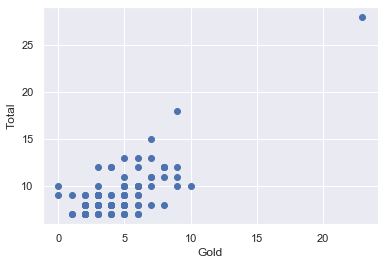

In [8]:
plt.scatter(gold, total)
plt.xlabel('Gold')
plt.ylabel('Total')
plt.grid(True)

In [9]:
X = np.array(gold).reshape(-1, 1)
y = np.array(total).reshape(-1, 1)
rf = LinearRegression()
rf.fit(X, y)
y_pred = rf.predict(X)


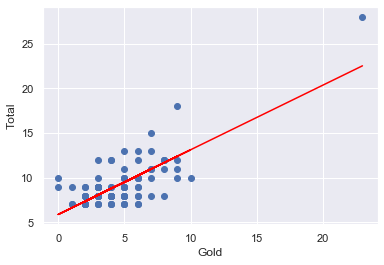

In [10]:
plt.scatter(gold, total)
plt.plot(X, y_pred, color='red')
plt.xlabel('Gold')
plt.ylabel('Total')
plt.grid(True)

In [11]:
print(f"R Squared: {r2_score(y, y_pred)}")

R Squared: 0.5632231106624824


#### Kısım 2 (Ekteki verisetlerinden biri üzerinde herhangi bir sınıflandırma algoritması gerçekleme) Sectiginiz verisetini Google Drive'da belirtiniz. Her kişi farklı veriseti seçmelidir. Veriseti üzerinde gerekiyorsa birtakım önişlemler yapılmalı, bir sınıflandırma modeli olusturularak modelin performansı çeşitli metriklerle sunulmalıdır.

https://docs.google.com/spreadsheets/d/19g8vDmC20FQGo2t-NQNb1MD6jwcJvfIJXwxl7vQCIlA/edit?usp=sharing

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

drug_test = pd.read_csv("drugLibTest_raw.tsv",sep='\t')
drug_train = pd.read_csv("drugLibTrain_raw.tsv",sep='\t')

In [13]:
drug_train.head(5)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


##### Drop Unnamed column for the test and train dataframes

In [14]:
test_keys = drug_test.keys()
train_keys = drug_train.keys()

drug_test_clean = drug_test.loc[:, test_keys[1]:test_keys[-1]]
drug_train_clean = drug_train.loc[:, train_keys[1]:train_keys[-1]]

##### effectiveness and sideEffects columns are categorical and have 5 steps we are going to change them to numerical

In [15]:
drug_test_clean["effectiveness"].replace({"Ineffective": 0, "Marginally Effective": 1,"Moderately Effective": 2,"Highly Effective": 3, "Considerably Effective": 4}, inplace=True)

drug_train_clean["effectiveness"].replace({"Ineffective": 0, "Marginally Effective": 1,"Moderately Effective": 2,"Highly Effective": 3, "Considerably Effective": 4}, inplace=True)

In [16]:
drug_test_clean['effectiveness'] = drug_test_clean['effectiveness'].astype('float').astype('int64')
drug_train_clean['effectiveness'] = drug_train_clean['effectiveness'].astype('float').astype('int64')


In [17]:
drug_test_clean["sideEffects"].replace({"No Side Effects": 0, "Mild Side Effects": 1,"Moderate Side Effects": 2,"Severe Side Effects": 3, "Extremely Severe Side Effects": 4}, inplace=True)

drug_train_clean["sideEffects"].replace({"No Side Effects": 0, "Mild Side Effects": 1,"Moderate Side Effects": 2,"Severe Side Effects": 3, "Extremely Severe Side Effects": 4}, inplace=True)

In [18]:
drug_test_clean['sideEffects'] = drug_test_clean['sideEffects'].astype('float').astype('int64')
drug_train_clean['sideEffects'] = drug_train_clean['sideEffects'].astype('float').astype('int64')

In [19]:
drug_train_clean.head(5)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,3,1,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,3,3,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,3,0,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,1,1,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,1,3,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


##### training dataframe info

In [20]:
drug_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   int64 
 3   sideEffects        3107 non-null   int64 
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(3), object(5)
memory usage: 194.3+ KB


In [21]:
drug_train_clean.describe()

,rating,effectiveness,sideEffects
count,3107.000000,3107.000000,3107.000000
mean,7.006115,2.806244,1.304796
std,2.937582,1.162485,1.177482
min,1.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000
50%,8.000000,3.000000,1.000000
75%,9.000000,4.000000,2.000000
max,10.000000,4.000000,4.000000


##### training dataframe missing values

In [22]:
drug_train_clean.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [23]:
#import numpy as np
#import sys
#np.set_printoptions(threshold=sys.maxsize)


#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

### Naive Bayes classifier

##### predicting effectiveness level

In [24]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(drug_train_clean.benefitsReview)
# transforms test reviews to above vectorized format
X_test = vectorizer.transform(drug_test_clean.benefitsReview)

In [185]:
y_train_rating = drug_train_clean.effectiveness > 2
clf = MultinomialNB().fit(X_train, y_train_rating)

# Evaluates model on test set
y_test_effectiveness = drug_test_clean.effectiveness  > 2
pred = clf.predict(X_test)

print(f"Accuracy: {clf.score(X_test, y_test_effectiveness)}")
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_effectiveness))

Accuracy: 0.7171814671814671
Confusion Matrix
[[ 22   0]
 [293 721]]


##### predicting sideEffects level

In [26]:
# Creates TF-IDF vectorizer and transforms the corpus
drug_train_clean_notNULL = drug_train_clean[drug_train_clean['sideEffectsReview'].notnull()]
vectorizer = TfidfVectorizer()
X_train_SideEff = vectorizer.fit_transform(drug_train_clean_notNULL.sideEffectsReview)
# transforms test reviews to above vectorized format
X_test_SideEff = vectorizer.transform(drug_test_clean.sideEffectsReview)


In [27]:
y_train_rating = drug_train_clean_notNULL.sideEffects > 2
clf = MultinomialNB().fit(X_train_SideEff, y_train_rating)

# Evaluates model on test set
y_test_sideEffects = drug_test_clean.sideEffects > 2
pred = clf.predict(X_test_SideEff)

print(f"Accuracy: {clf.score(X_test_SideEff, y_test_sideEffects)}")
print("Confusion Matrix:")
print(confusion_matrix(pred, y_test_sideEffects))

Accuracy: 0.806949806949807
Confusion Matrix:
[[834 200]
 [  0   2]]


#### Kısım 3 (Dünya kupası verini kumeleme) Herhangi bir kümeleme yontemi ile kumelenmeli ve modelin performansı sunulmalıdır.

https://www.kaggle.com/oliversinn/fifa-18-visualisation-clustering-ml/data

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import IncrementalPCA
%matplotlib inline

In [29]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [30]:
fifa18_df = pd.read_csv('complete.csv', encoding = 'utf8')

In [31]:
fifa18_df.head(5)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [32]:
fifa18_df.shape

(17994, 185)

In [33]:
fifa18_df.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

In [34]:
fifa18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 14.3+ MB


In [35]:
fifa18_df.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,1.650000e+04,17994.000000,17994.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,207791.796543,1594.417306,25.120151,181.271980,75.400856,2.370511e+06,11503.834612,4.449111e+06,66.253029,71.200400,...,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,32328.527723,271.587232,4.617428,6.690392,6.994824,5.347250e+06,23050.661073,1.055955e+07,6.946729,6.082015,...,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,728.000000,16.000000,155.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,46.000000,46.000000,...,25.000000,30.000000,31.000000,31.000000,27.000000,27.000000,30.000000,26.000000,25.000000,46.000000
25%,192621.250000,1450.250000,21.000000,177.000000,70.000000,3.000000e+05,2000.000000,5.280000e+05,62.000000,67.000000,...,45.000000,50.000000,51.000000,52.000000,53.000000,53.000000,53.000000,49.000000,45.000000,59.000000
50%,214186.000000,1634.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000,1.200000e+06,66.000000,71.000000,...,57.000000,58.000000,58.000000,59.000000,60.000000,60.000000,59.000000,58.000000,57.000000,65.000000
75%,231615.750000,1785.000000,28.000000,186.000000,80.000000,2.000000e+06,12000.000000,3.600000e+06,71.000000,75.000000,...,65.000000,64.000000,64.000000,65.000000,66.000000,66.000000,65.000000,65.000000,65.000000,70.000000
max,241489.000000,2291.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000,2.368000e+08,94.000000,94.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


In [36]:
fifa18_df.isna().sum()

ID               0
name             0
full_name        0
club           253
club_logo      253
              ... 
prefers_lam      0
prefers_lcm      0
prefers_ldm      0
prefers_lcb      0
prefers_gk       0
Length: 185, dtype: int64

### K-Means clustering for Spanish Primera División league (La Liga)


In [147]:
laliga_players = fifa18_df[(fifa18_df['league'] == 'Spanish Primera División')]

##### Later in data visualization will use these lists

In [38]:
names = laliga_players['name'].tolist()
clubs = laliga_players['club'].tolist()
overall = laliga_players['overall'].tolist()

 ##### normalise the players statistics by the club 

In [39]:
laliga_players_ = laliga_players.groupby('club').transform(lambda x: (x - x.mean()) / x.std())
laliga = laliga_players_._get_numeric_data()
laliga = laliga.fillna(laliga.mean())

##### Drop columns with all NaN's

In [40]:
laliga = laliga.dropna(axis=1, how='all')

##### Now our dataframe is clean and doesn't have columns with all nans

In [41]:
laliga.head(5)

,ID,special,age,height_cm,weight_kg,real_face,eur_value,eur_wage,eur_release_clause,overall,...,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_gk
0,-4.176193,1.117387,1.723410,0.926701,1.292591,1.133893,2.514913,2.967469,2.466910,1.616232,...,2.834734,-9.481108e-17,-0.457851,-0.566947,-0.340168,-0.512823,-0.400892,-0.457851,-3.146300e-17,-0.340168
1,-0.552327,0.667323,1.016384,-1.499273,-0.416951,0.565194,3.054196,3.145550,3.028699,2.142341,...,-0.437798,4.694855e+00,-0.204124,-0.758288,-0.295163,-0.437798,-0.370006,-0.295163,-3.146300e-17,-0.370006
3,-0.144223,1.121889,1.016384,0.428364,1.806788,0.565194,2.725217,2.678390,2.698734,1.933332,...,-0.437798,-2.041241e-01,-0.204124,-0.758288,-0.295163,-0.437798,-0.370006,-0.295163,-3.146300e-17,-0.370006
8,-0.416972,0.919707,0.621687,0.358505,0.878962,1.133893,1.885197,1.273616,1.841190,1.159116,...,-0.340168,-9.481108e-17,-0.457851,1.700840,-0.340168,1.880350,-0.400892,-0.457851,-3.146300e-17,-0.340168
10,-1.036667,0.882053,1.503066,0.547904,0.258518,1.133893,0.854752,1.047769,0.815603,1.159116,...,-0.340168,-9.481108e-17,-0.457851,-0.566947,-0.340168,-0.512823,2.405351,-0.457851,-3.146300e-17,-0.340168


In [42]:
#np.seterr(divide='ignore', invalid='ignore')

In [56]:
x = laliga.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()  # could also test using the StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [167]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
laliga_trans = pd.DataFrame(pca.fit_transform(X_norm))

In [168]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( laliga_trans )
  cluster_errors.append( clusters.inertia_ )

In [169]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

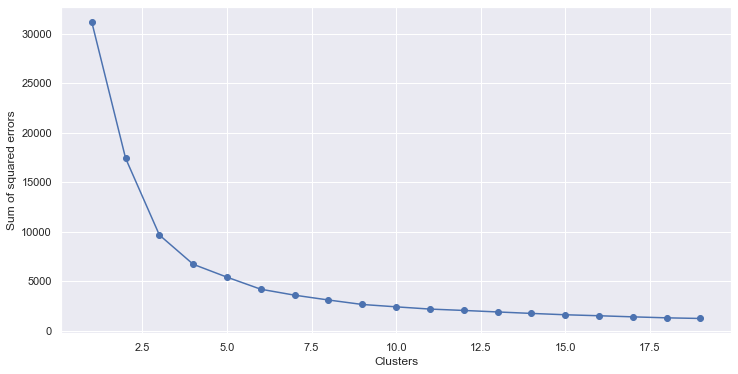

In [170]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.grid(True)

##### Dataframe is going to be divided into 8 clusters

In [171]:
kmeans = KMeans(n_clusters=8)
kmeans = kmeans.fit(laliga_trans)
# Getting the cluster labels
labels = kmeans.predict(laliga_trans)
# Centroid values
C = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [172]:
laliga_trans['cluster'] = clusters
laliga_trans['name'] = names
laliga_trans['club'] = clubs
laliga_trans['overall'] = overall

In [173]:
laliga_trans.columns = ['x','y','cluster','name','club','overall']

In [174]:
laliga_trans.sort_values(by='cluster',ascending = True).head(6)

,x,y,cluster,name,club,overall
281,6.641477,-5.020043,0,Rubén Blanco,RC Celta de Vigo,75
477,8.738182,-6.027672,0,José Suarez,Girona CF,67
585,9.880355,-5.838710,0,Dani Cárdenas,Levante UD,60
417,8.633191,-5.318318,0,C. Gönen,Málaga CF,71
521,9.602652,-6.484398,0,Edu Frias,RCD Espanyol,64
386,8.101337,-5.165096,0,Rubén,RC Deportivo de La Coruña,72


In [175]:
#sns.set(font_scale=1)

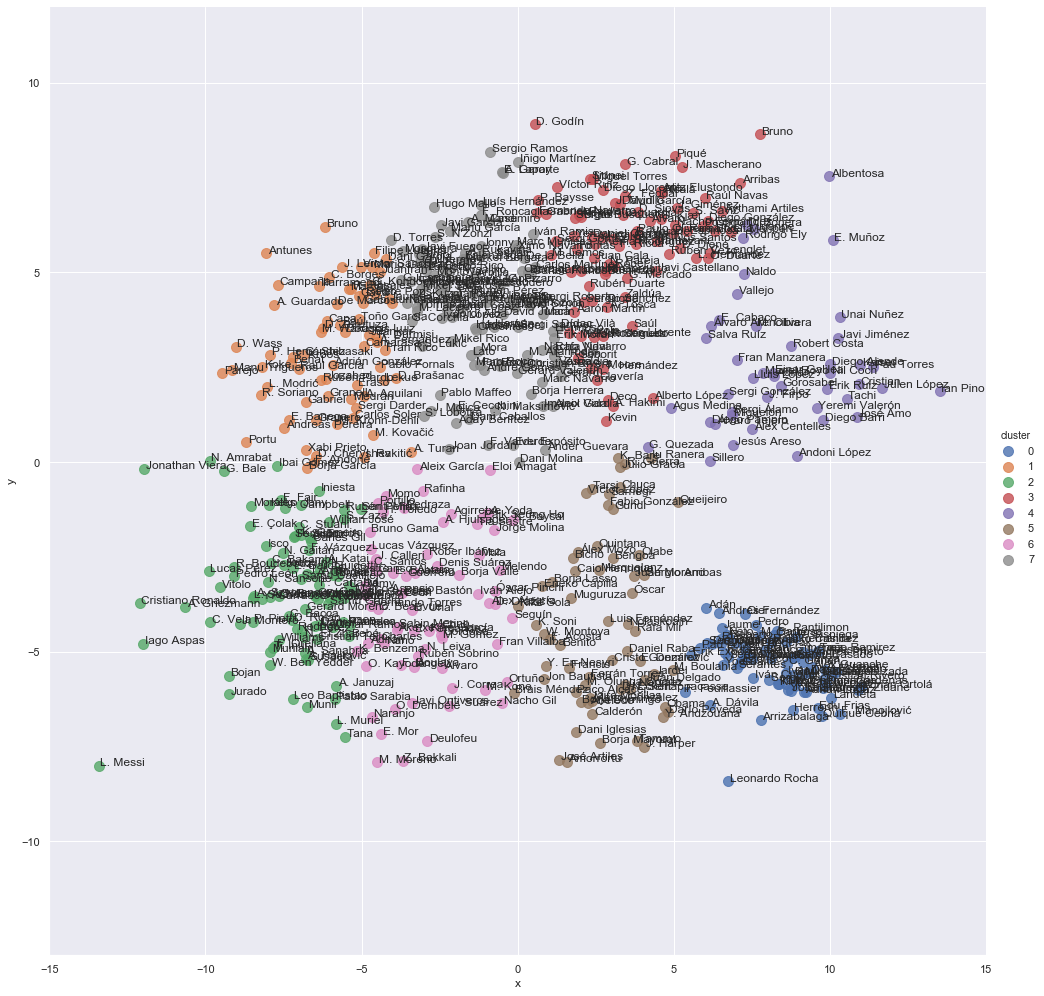

In [177]:
ax = sns.lmplot(x="x", y="y",hue='cluster', data=laliga_trans, fit_reg=False, size =14, scatter_kws={"s": 100})

ax.set(xlim=(-15, 15))
ax.set(ylim=(-13, 12))



def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y'], str(point['val']))

label_point(laliga_trans.x, laliga_trans.y, laliga_trans.name, plt.gca())

plt.show()

